CUSTOM TRAINING

TABLE OF CONTENTS


.............

intro

In [ ]:
# setup

In [ ]:
# example 1: very simṕle

In [36]:
TRUE_w = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 100


#
y_true = (TRUE_w * xs) + TRUE_b

# Generate data with added noise
xs = tf.random.normal(shape=[NUM_EXAMPLES]) # x = np.linspace(0, 10, num_samples)  # Create evenly spaced values from 0 to 10
noise = tf.random.normal(shape=[NUM_EXAMPLES], mean=0.0, stddev=0.1)  # Small noise
ys = (TRUE_w * xs) + TRUE_b + noise


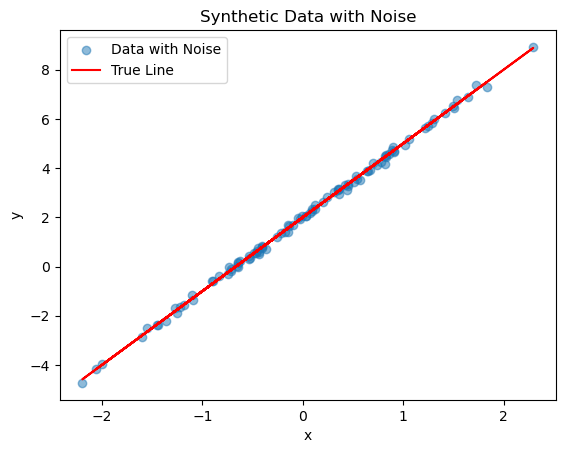

In [37]:
import matplotlib.pyplot as plt

plt.scatter(xs, ys, alpha=0.5, label='Data with Noise')
plt.plot(xs, TRUE_w * xs + TRUE_b, color='red', label='True Line')
plt.title('Synthetic Data with Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


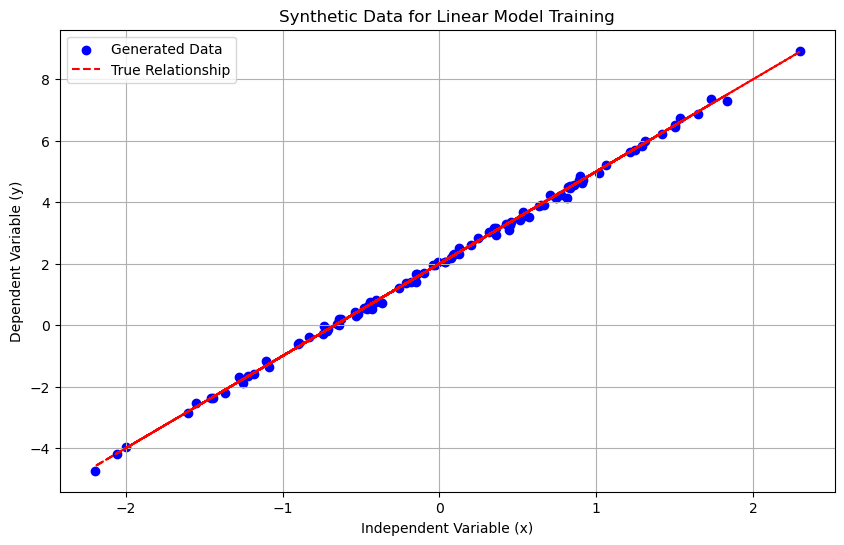

In [45]:

y_true = (TRUE_w * xs) + TRUE_b



# 5. Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(xs, ys, label='Generated Data', color='blue')  # Scatter plot of the noisy data
plt.plot(xs, y_true, label='True Relationship', color='red', linestyle='--') # Line plot of the true relationship

# 6. Add labels and title
plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (y)')
plt.title('Synthetic Data for Linear Model Training')
plt.legend()
plt.grid(True)
plt.show()

# 7. (Optional) Print the generated data if you want to see the values
# print("Generated x values:", x)
# print("Generated y values:", y)

In [38]:


class Model(object):
    def __init__(self):
        # Random weight initialization, zero bias initialization
        self.w = tf.Variable(tf.random.normal(shape=[], mean=0.0, stddev=0.1))
        self.b = tf.Variable(0.0)  # Bias initialized to zero

    def __call__(self, x):
        return self.w * x + self.b

model = Model()


In [39]:
loss_fn = tf.keras.losses.MeanSquaredError()

In [42]:
def train(model, inputs, outputs, loss_fn, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss_fn(outputs, model(inputs))  
    
    dw, db = t.gradient(current_loss, [model.w, model.b])
    
    # Update model parameters
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    
    return current_loss.numpy()


In [44]:
model = Model()

# Collect the history of W-values and b-values to plot later

# Collect the history of W-values and b-values to plot later
list_w, list_b = [], []
epochs = range(15)
losses = []
for epoch in epochs:
    list_w.append(model.w.numpy())
    list_b.append(model.b.numpy())
    current_loss = train(model, xs, ys, loss, learning_rate=0.1)
    losses.append(current_loss)
    print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=0.01 b=0.00, loss=11.97257
Epoch  1: w=0.53 b=0.41, loss=7.92724
Epoch  2: w=0.96 b=0.74, loss=5.25676
Epoch  3: w=1.32 b=1.00, loss=3.49154
Epoch  4: w=1.61 b=1.21, loss=2.32317
Epoch  5: w=1.85 b=1.37, loss=1.54880
Epoch  6: w=2.05 b=1.50, loss=1.03490
Epoch  7: w=2.22 b=1.61, loss=0.69340
Epoch  8: w=2.35 b=1.69, loss=0.46616
Epoch  9: w=2.46 b=1.75, loss=0.31476
Epoch 10: w=2.56 b=1.80, loss=0.21376
Epoch 11: w=2.63 b=1.84, loss=0.14630
Epoch 12: w=2.70 b=1.88, loss=0.10118
Epoch 13: w=2.75 b=1.90, loss=0.07097
Epoch 14: w=2.79 b=1.92, loss=0.05071


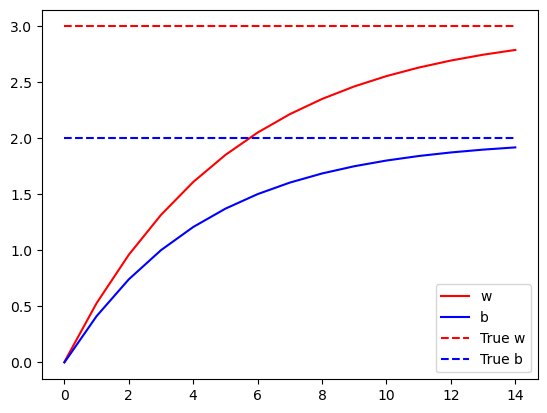

In [46]:
plt.plot(epochs, list_w, 'r',
       epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--',
      [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

In [48]:
def plot_data(inputs, outputs, predicted_outputs):
    real = plt.scatter(inputs, outputs, c='b', marker='.')
    predicted = plt.scatter(inputs, predicted_outputs, c='r', marker='+')
    plt.legend((real,predicted), ('Real Data', 'Predicted Data'))
    plt.show()

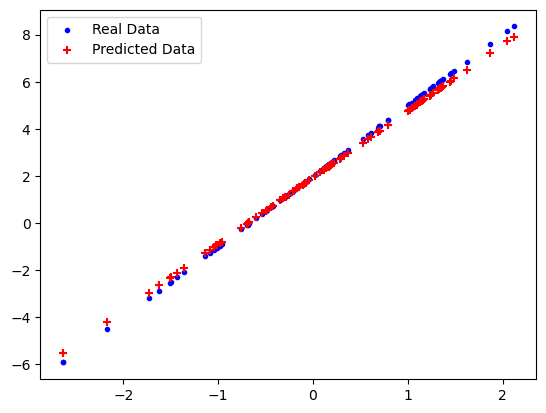

In [49]:
test_inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
test_outputs = test_inputs * TRUE_w + TRUE_b

predicted_test_outputs = model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)

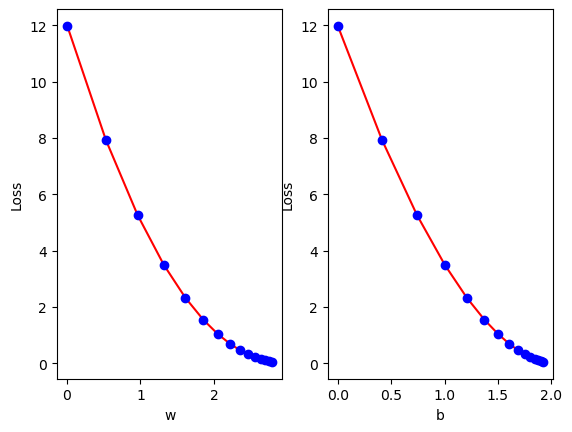

In [50]:
def plot_loss_for_weights(weights_list, losses):
    for idx, weights in enumerate(weights_list):
        plt.subplot(120 + idx + 1)
        plt.plot(weights['values'], losses, 'r')
        plt.plot(weights['values'], losses, 'bo')
        plt.xlabel(weights['name'])
        plt.ylabel('Loss')
    
    
weights_list = [{ 'name' : "w",
                  'values' : list_w
                },
                {
                  'name' : "b",
                  'values' : list_b
                }]

plot_loss_for_weights(weights_list, losses)

### Example 2

In [53]:
from tqdm import tqdm
import tensorflow_datasets as tfds

In [93]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data (scaling pixel values to [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add channel dimension for compatibility with CNNs
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Data is now ready for training


In [94]:



def base_model():
    inputs = tf.keras.Input(shape=(28, 28, 1), name='digits')
    x = layers.Flatten()(inputs)
    x = layers.Dense(64, activation='relu', name='dense_1')(x)
    x = layers.Dense(64, activation='relu', name='dense_2')(x)
    outputs = layers.Dense(10, activation='softmax', name='predictions')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

In [95]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.CategoricalCrossentropy() # no sparse because tengo one-hot encoded

In [96]:
train_acc_metric = tf.keras.metrics.CategoricalAccuracy()
val_acc_metric = tf.keras.metrics.CategoricalAccuracy()

The core of training is using the model to calculate the logits on specific set of inputs and compute loss (in this case sparse categorical crossentropy) by comparing the predicted outputs to the true outputs. You then update the trainable weights using the optimizer algorithm chosen. Optimizer algorithm requires your computed loss and partial derivatives of loss with respect to each of the trainable weights to make updates to the same.

You use gradient tape to calculate the gradients and then update the model trainable weights using the optimizer.

In [97]:
def apply_gradient(optimizer, model, x, y):
    with tf.GradientTape() as tape:
        logits = model(x)
        loss_value = loss_object(y_true=y, y_pred=logits)

    gradients = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    return logits, loss_value

This function performs training during one epoch. You run through all batches of training data in each epoch to make updates to trainable weights using your previous function. You can see that we also call update_state on your metrics to accumulate the value of your metrics. You are displaying a progress bar to indicate completion of training in each epoch. Here you use tqdm for displaying the progress bar.

In [98]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)

In [99]:


# dataset (que será train, model, optimizer, training data)
def train_data_for_one_epoch():
    
    losses = []
    pbar = tqdm(total=len(list(enumerate(dataset))), position=0, leave=True, 
                bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} ')
    
    for step, (x_batch_train, y_batch_train) in enumerate(dataset):
        logits, loss_value = apply_gradient(optimizer, model, x_batch_train, y_batch_train)
      
        losses.append(loss_value)
      
        train_acc_metric(y_batch_train, logits)
        pbar.set_description("Training loss for step %s: %.4f" % (int(step), float(loss_value)))
        pbar.update()
    return losses

In [100]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

In [101]:

# pasar test_dataset, model

def perform_validation():
    losses = []
    for x_val, y_val in test_dataset:
        val = model(x_val)
        val_loss = loss_object(y_true=y_val, y_pred=val)
        losses.append(val_loss)
        val_acc_metric(y_val, val)
    return losses

Next you define the training loop that runs through the training samples repeatedly over a fixed number of epochs. Here you combine the functions you built earlier to establish the following flow:

Perform training over all batches of training data.
Get values of metrics.
Perform validation to calculate loss and update validation metrics on test data.
Reset the metrics at the end of epoch.
Display statistics at the end of each epoch.
Note : You also calculate the training and validation losses for the whole epoch at the end of the epoch.

In [102]:
model = base_model()

# Iterate over epochs.
epochs = 10
epochs_val_losses, epochs_train_losses = [], []
for epoch in range(epochs):
    print('Start of epoch %d' % (epoch,))

    losses_train = train_data_for_one_epoch()
    train_acc = train_acc_metric.result()

    losses_val = perform_validation()
    val_acc = val_acc_metric.result()

    losses_train_mean = np.mean(losses_train)
    losses_val_mean = np.mean(losses_val)
    epochs_val_losses.append(losses_val_mean)
    epochs_train_losses.append(losses_train_mean)

    print('\n Epoch %s: Train loss: %.4f  Validation Loss: %.4f, Train Accuracy: %.4f, Validation Accuracy %.4f' % (epoch, float(losses_train_mean), float(losses_val_mean), float(train_acc), float(val_acc)))

    train_acc_metric.reset_states()
    val_acc_metric.reset_states()

Start of epoch 0


Training loss for step 1874: 0.0554: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 



 Epoch 0: Train loss: 0.2906  Validation Loss: 0.1814, Train Accuracy: 0.9139, Validation Accuracy 0.9419
Start of epoch 1


Training loss for step 1192: 0.0417:  64%|█████████████████████████████████████████████████████████████████████████████▌                                            | 1192/1875 

KeyboardInterrupt: 

## Examnple 3

In [7]:
import tensorflow as tf
import numpy as np

# Generate synthetic data
X = np.random.rand(1000, 1).astype(np.float32)
y = 3 * X + 2 + 0.1 * np.random.randn(1000, 1).astype(np.float32)

# Split data (80% train, 20% validation)
X_train, X_val = X[:800], X[800:]
y_train, y_val = y[:800], y[800:]

# Create TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).shuffle(800)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)


In [8]:
class LinearModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense = tf.keras.layers.Dense(1)

    def call(self, inputs):
        return self.dense(inputs)


In [9]:
model = LinearModel()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.MeanSquaredError()

# Custom training loop
for epoch in range(50):
    # Training step
    with tf.GradientTape() as tape:
        predictions = model(X_train)
        loss = loss_fn(y_train, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))


    # Validation step (ensure consistent shapes)
    val_predictions = model(X_val, training=False)  # Ensure batch-like behavior is off
    val_loss = loss_fn(y_val, val_predictions).numpy()

    print(f"Epoch {epoch+1}, Loss: {loss.numpy():.4f}, Val Loss: {val_loss:.4f}")



Epoch 1, Loss: 17.6917, Val Loss: 17.8833
Epoch 2, Loss: 16.8365, Val Loss: 17.0342
Epoch 3, Loss: 16.0237, Val Loss: 16.2268
Epoch 4, Loss: 15.2512, Val Loss: 15.4591
Epoch 5, Loss: 14.5170, Val Loss: 14.7291
Epoch 6, Loss: 13.8191, Val Loss: 14.0350
Epoch 7, Loss: 13.1559, Val Loss: 13.3749
Epoch 8, Loss: 12.5255, Val Loss: 12.7472
Epoch 9, Loss: 11.9263, Val Loss: 12.1503
Epoch 10, Loss: 11.3569, Val Loss: 11.5827
Epoch 11, Loss: 10.8156, Val Loss: 11.0429
Epoch 12, Loss: 10.3012, Val Loss: 10.5295
Epoch 13, Loss: 9.8122, Val Loss: 10.0413
Epoch 14, Loss: 9.3475, Val Loss: 9.5770
Epoch 15, Loss: 8.9057, Val Loss: 9.1354
Epoch 16, Loss: 8.4859, Val Loss: 8.7155
Epoch 17, Loss: 8.0868, Val Loss: 8.3160
Epoch 18, Loss: 7.7075, Val Loss: 7.9361
Epoch 19, Loss: 7.3470, Val Loss: 7.5748
Epoch 20, Loss: 7.0043, Val Loss: 7.2311
Epoch 21, Loss: 6.6785, Val Loss: 6.9042
Epoch 22, Loss: 6.3689, Val Loss: 6.5932
Epoch 23, Loss: 6.0746, Val Loss: 6.2974
Epoch 24, Loss: 5.7948, Val Loss: 6.0160


In [3]:
model = LinearModel()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.MeanSquaredError()

# Custom training loop
for epoch in range(50):
    # Training loop
    for x_batch, y_batch in train_ds:
        with tf.GradientTape() as tape:
            predictions = model(x_batch)
            loss = loss_fn(y_batch, predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Validation loop
    val_loss = tf.keras.metrics.Mean()
    for x_val, y_val in val_ds:
        val_predictions = model(x_val)
        val_loss.update_state(loss_fn(y_val, val_predictions))

    print(f"Epoch {epoch+1}, Loss: {loss.numpy():.4f}, Val Loss: {val_loss.result().numpy():.4f}")


Epoch 1, Loss: 6.4286, Val Loss: 5.4069
Epoch 2, Loss: 2.4574, Val Loss: 1.7634
Epoch 3, Loss: 1.0465, Val Loss: 0.7546
Epoch 4, Loss: 0.3116, Val Loss: 0.4702
Epoch 5, Loss: 0.4678, Val Loss: 0.3808
Epoch 6, Loss: 0.3974, Val Loss: 0.3414
Epoch 7, Loss: 0.3420, Val Loss: 0.3177
Epoch 8, Loss: 0.4450, Val Loss: 0.2976
Epoch 9, Loss: 0.3203, Val Loss: 0.2792
Epoch 10, Loss: 0.3480, Val Loss: 0.2621
Epoch 11, Loss: 0.2374, Val Loss: 0.2459
Epoch 12, Loss: 0.2685, Val Loss: 0.2307
Epoch 13, Loss: 0.3207, Val Loss: 0.2164
Epoch 14, Loss: 0.2105, Val Loss: 0.2033
Epoch 15, Loss: 0.2068, Val Loss: 0.1907
Epoch 16, Loss: 0.2425, Val Loss: 0.1788
Epoch 17, Loss: 0.2540, Val Loss: 0.1679
Epoch 18, Loss: 0.1814, Val Loss: 0.1576
Epoch 19, Loss: 0.2261, Val Loss: 0.1481
Epoch 20, Loss: 0.1326, Val Loss: 0.1391
Epoch 21, Loss: 0.1289, Val Loss: 0.1308
Epoch 22, Loss: 0.1842, Val Loss: 0.1228
Epoch 23, Loss: 0.1797, Val Loss: 0.1155
Epoch 24, Loss: 0.1156, Val Loss: 0.1085
Epoch 25, Loss: 0.0881, V

In [4]:
# including early stopping
model = LinearModel()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.MeanSquaredError()

# Early stopping parameters
best_val_loss = float('inf')
patience = 5
wait = 0

# Custom training loop
for epoch in range(50):
    # Training loop
    for x_batch, y_batch in train_ds:
        with tf.GradientTape() as tape:
            predictions = model(x_batch)
            loss = loss_fn(y_batch, predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Validation loop
    val_loss = tf.keras.metrics.Mean()
    for x_val, y_val in val_ds:
        val_predictions = model(x_val)
        val_loss.update_state(loss_fn(y_val, val_predictions))

    current_val_loss = val_loss.result().numpy()
    print(f"Epoch {epoch+1}, Loss: {loss.numpy():.4f}, Val Loss: {current_val_loss:.4f}")

    # Early stopping logic
    if current_val_loss < best_val_loss:
        best_val_loss = current_val_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break


Epoch 1, Loss: 3.5487, Val Loss: 2.8973
Epoch 2, Loss: 1.0426, Val Loss: 0.8374
Epoch 3, Loss: 0.4330, Val Loss: 0.2730
Epoch 4, Loss: 0.1855, Val Loss: 0.1174
Epoch 5, Loss: 0.0720, Val Loss: 0.0734
Epoch 6, Loss: 0.0782, Val Loss: 0.0597
Epoch 7, Loss: 0.0672, Val Loss: 0.0541
Epoch 8, Loss: 0.0579, Val Loss: 0.0507
Epoch 9, Loss: 0.0718, Val Loss: 0.0479
Epoch 10, Loss: 0.0688, Val Loss: 0.0454
Epoch 11, Loss: 0.0397, Val Loss: 0.0431
Epoch 12, Loss: 0.0349, Val Loss: 0.0408
Epoch 13, Loss: 0.0432, Val Loss: 0.0387
Epoch 14, Loss: 0.0563, Val Loss: 0.0368
Epoch 15, Loss: 0.0299, Val Loss: 0.0350
Epoch 16, Loss: 0.0322, Val Loss: 0.0333
Epoch 17, Loss: 0.0329, Val Loss: 0.0317
Epoch 18, Loss: 0.0324, Val Loss: 0.0302
Epoch 19, Loss: 0.0248, Val Loss: 0.0288
Epoch 20, Loss: 0.0332, Val Loss: 0.0275
Epoch 21, Loss: 0.0359, Val Loss: 0.0263
Epoch 22, Loss: 0.0238, Val Loss: 0.0251
Epoch 23, Loss: 0.0303, Val Loss: 0.0240
Epoch 24, Loss: 0.0293, Val Loss: 0.0230
Epoch 25, Loss: 0.0205, V